In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


%matplotlib inline

In [57]:
data = pd.read_csv("kc_house_data.csv")
data.head(20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [58]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [59]:
data = data.drop(['id','date'],axis=1)

<function seaborn.utils.despine>

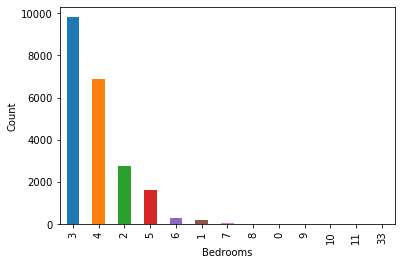

In [60]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

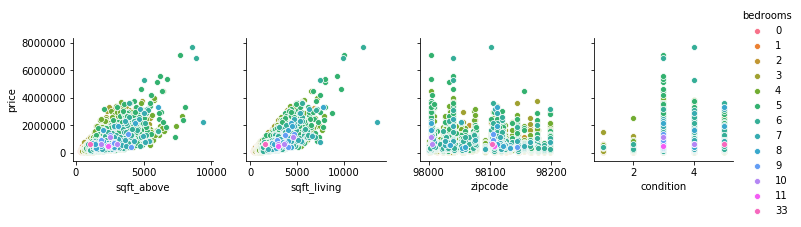

In [61]:
sns.pairplot(data, 
             x_vars=["sqft_above", "sqft_living", "zipcode", "condition"], 
             y_vars=["price"],    #determining what variables affect price the most
             hue = "bedrooms"
             )

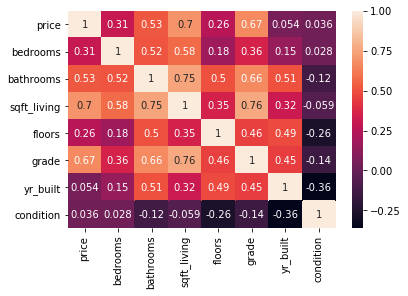

In [62]:
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sns.heatmap(data[columns].corr(),annot=True)

In [101]:
train1 = data[['sqft_living']]    #basic simple variable linear regression analysis
y = data[['price']]
X_train, X_test, y_train, y_test = train_test_split(train1,y, test_size=.3, random_state=10)

In [102]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Accuracy score:", regressor.score(X_test, y_test)*100,"%")

Accuracy score: 49.92613227837664 %


In [103]:
train2 = data[['sqft_living15', 'sqft_lot15', 'condition', 'grade','sqft_above','waterfront']]
X_train, X_test, y_train, y_test = train_test_split(train2,y, test_size=.3, random_state=10)

In [104]:
multireg= LinearRegression()
multireg.fit(X_train, y_train)
y_prediction = multireg.predict(X_test)

print("Accuracy score:", multireg.score(X_test, y_test)*100,"%")

Accuracy score: 52.77520106885903 %


In [105]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [106]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
tree.score(X_test,y_test)
y_pred = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
print("Accuracy score:", tree.score(X_test, y_test)*100,"%")


Accuracy score: 75.29487425284321 %


In [107]:
rf= RandomForestRegressor(n_estimators=28,random_state=0)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
rf_pred =rf.predict(X_test)
rf_score=rf.score(X_test,y_test)
print("Acuracy score:", (rf.score(X_test,y_test))*100,"%")



Acuracy score: 88.0086897915447 %
